### import packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

plt.rcParams.update({'font.size': 14})  # default font size 14

### load data

In [5]:
paleoseismicity = pd.read_excel('data_compilation.xlsx')
print(paleoseismicity.head())

   Year  Start   End Type_lat_lon Type  \
0  1394    5.0   2.5          NaN  NaN   
1  1450   14.0   2.5          Lat  NaN   
2  1660    5.0   3.5          Lat  NaN   
3  1679   14.0  13.0          Lat  NaN   
4  1847    7.5   6.6          Lat  NaN   

                               Primary source  Subduction zone  \
0                       Meltzner et al., 2010  Sumatra-Andaman   
1                       Meltzner et al., 2010  Sumatra-Andaman   
2                                   Reid 2016  Sumatra-Andaman   
3  Rajendran et al., 2007; Malik et al., 2011  Sumatra-Andaman   
4                         Bilham et al., 2005  Sumatra-Andaman   

               Segment                         Source   
0  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
1  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
2  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
3  Aceh-Adaman segment  Philibosian and Metlzner, 2020  
4  Aceh-Adaman segment  Philibosian and Metlzner, 2020  


### Plot catalogs
Subdivided per subduction zone and color-coded by subsection of the megathrust 

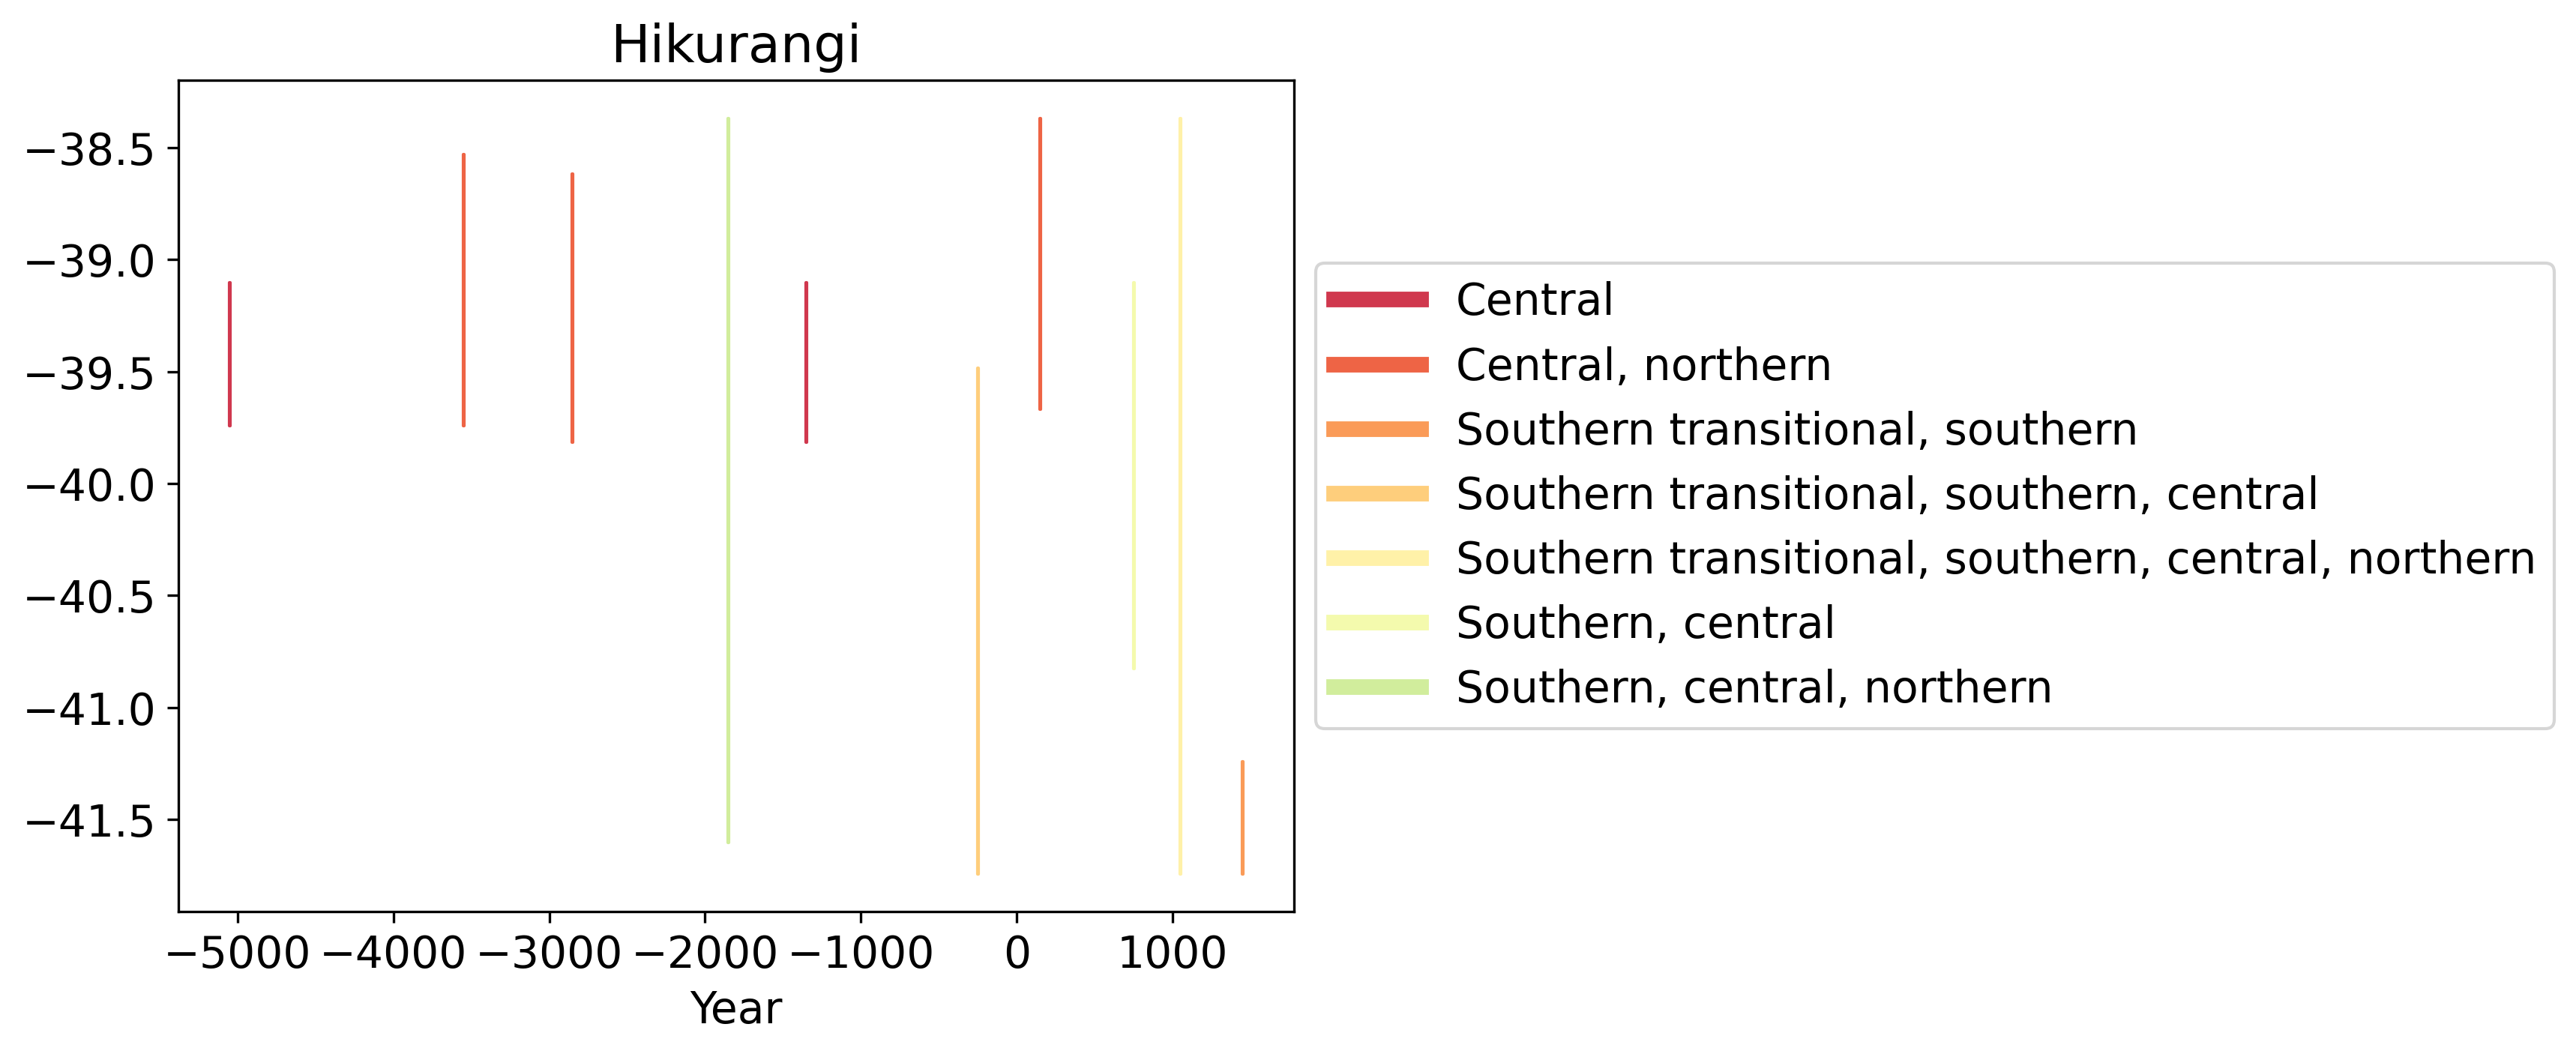

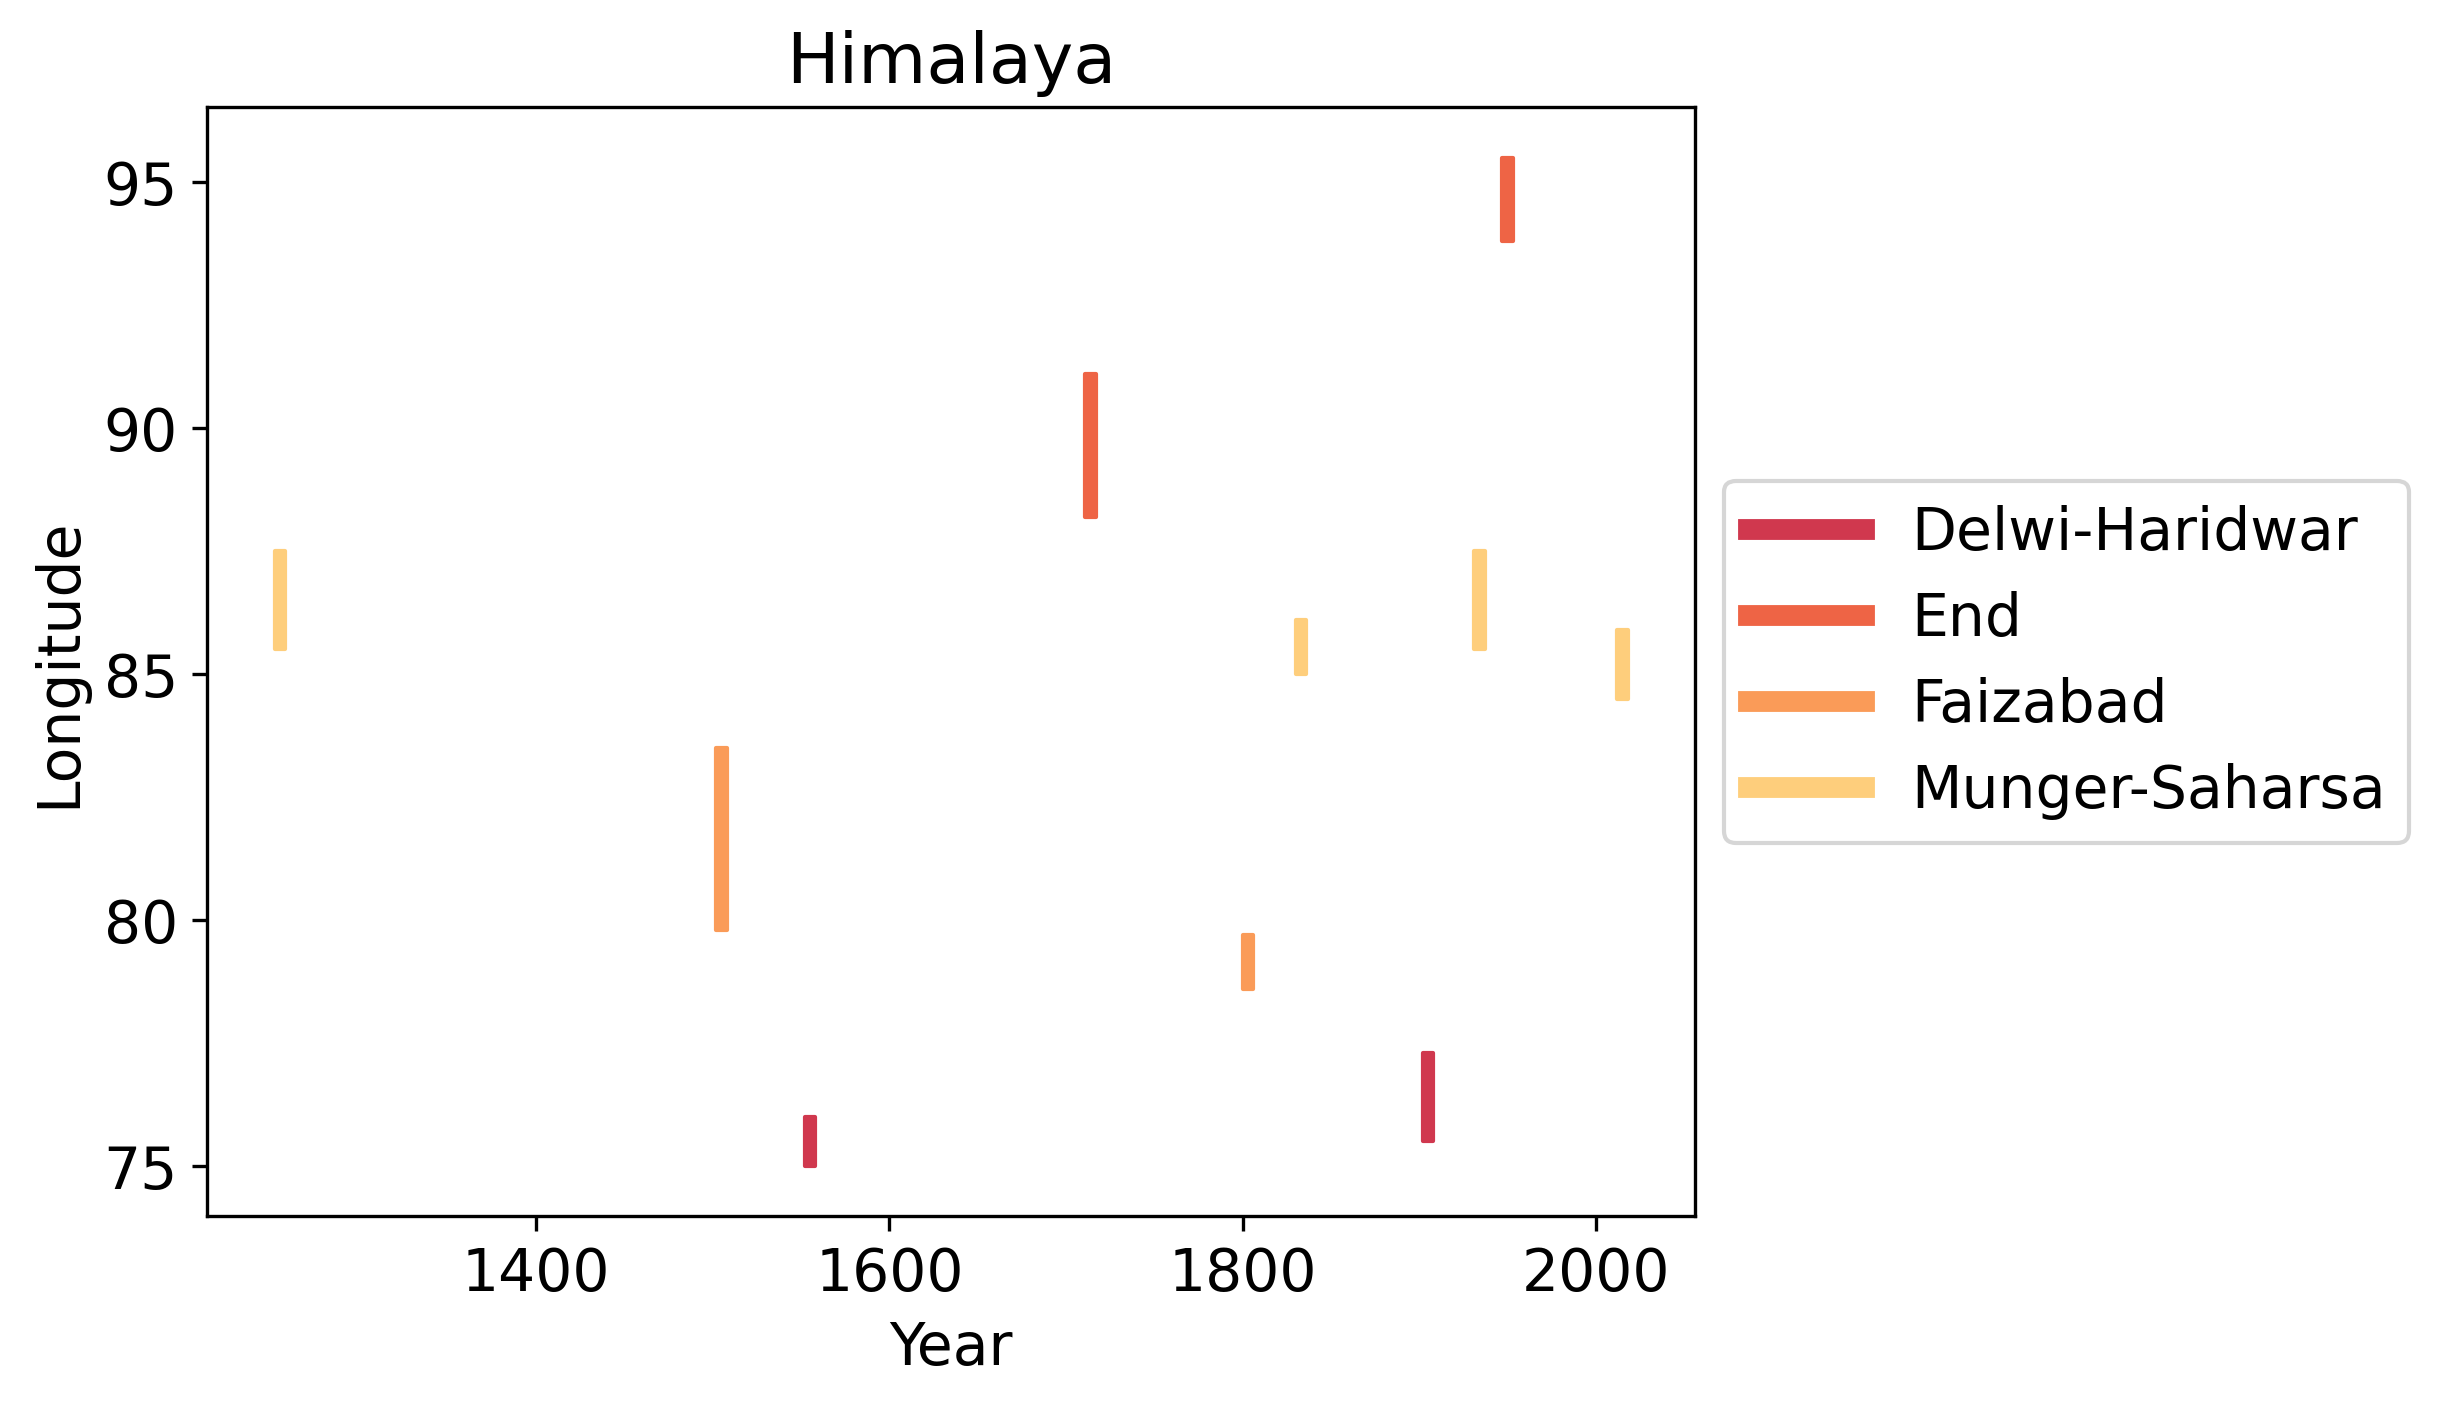

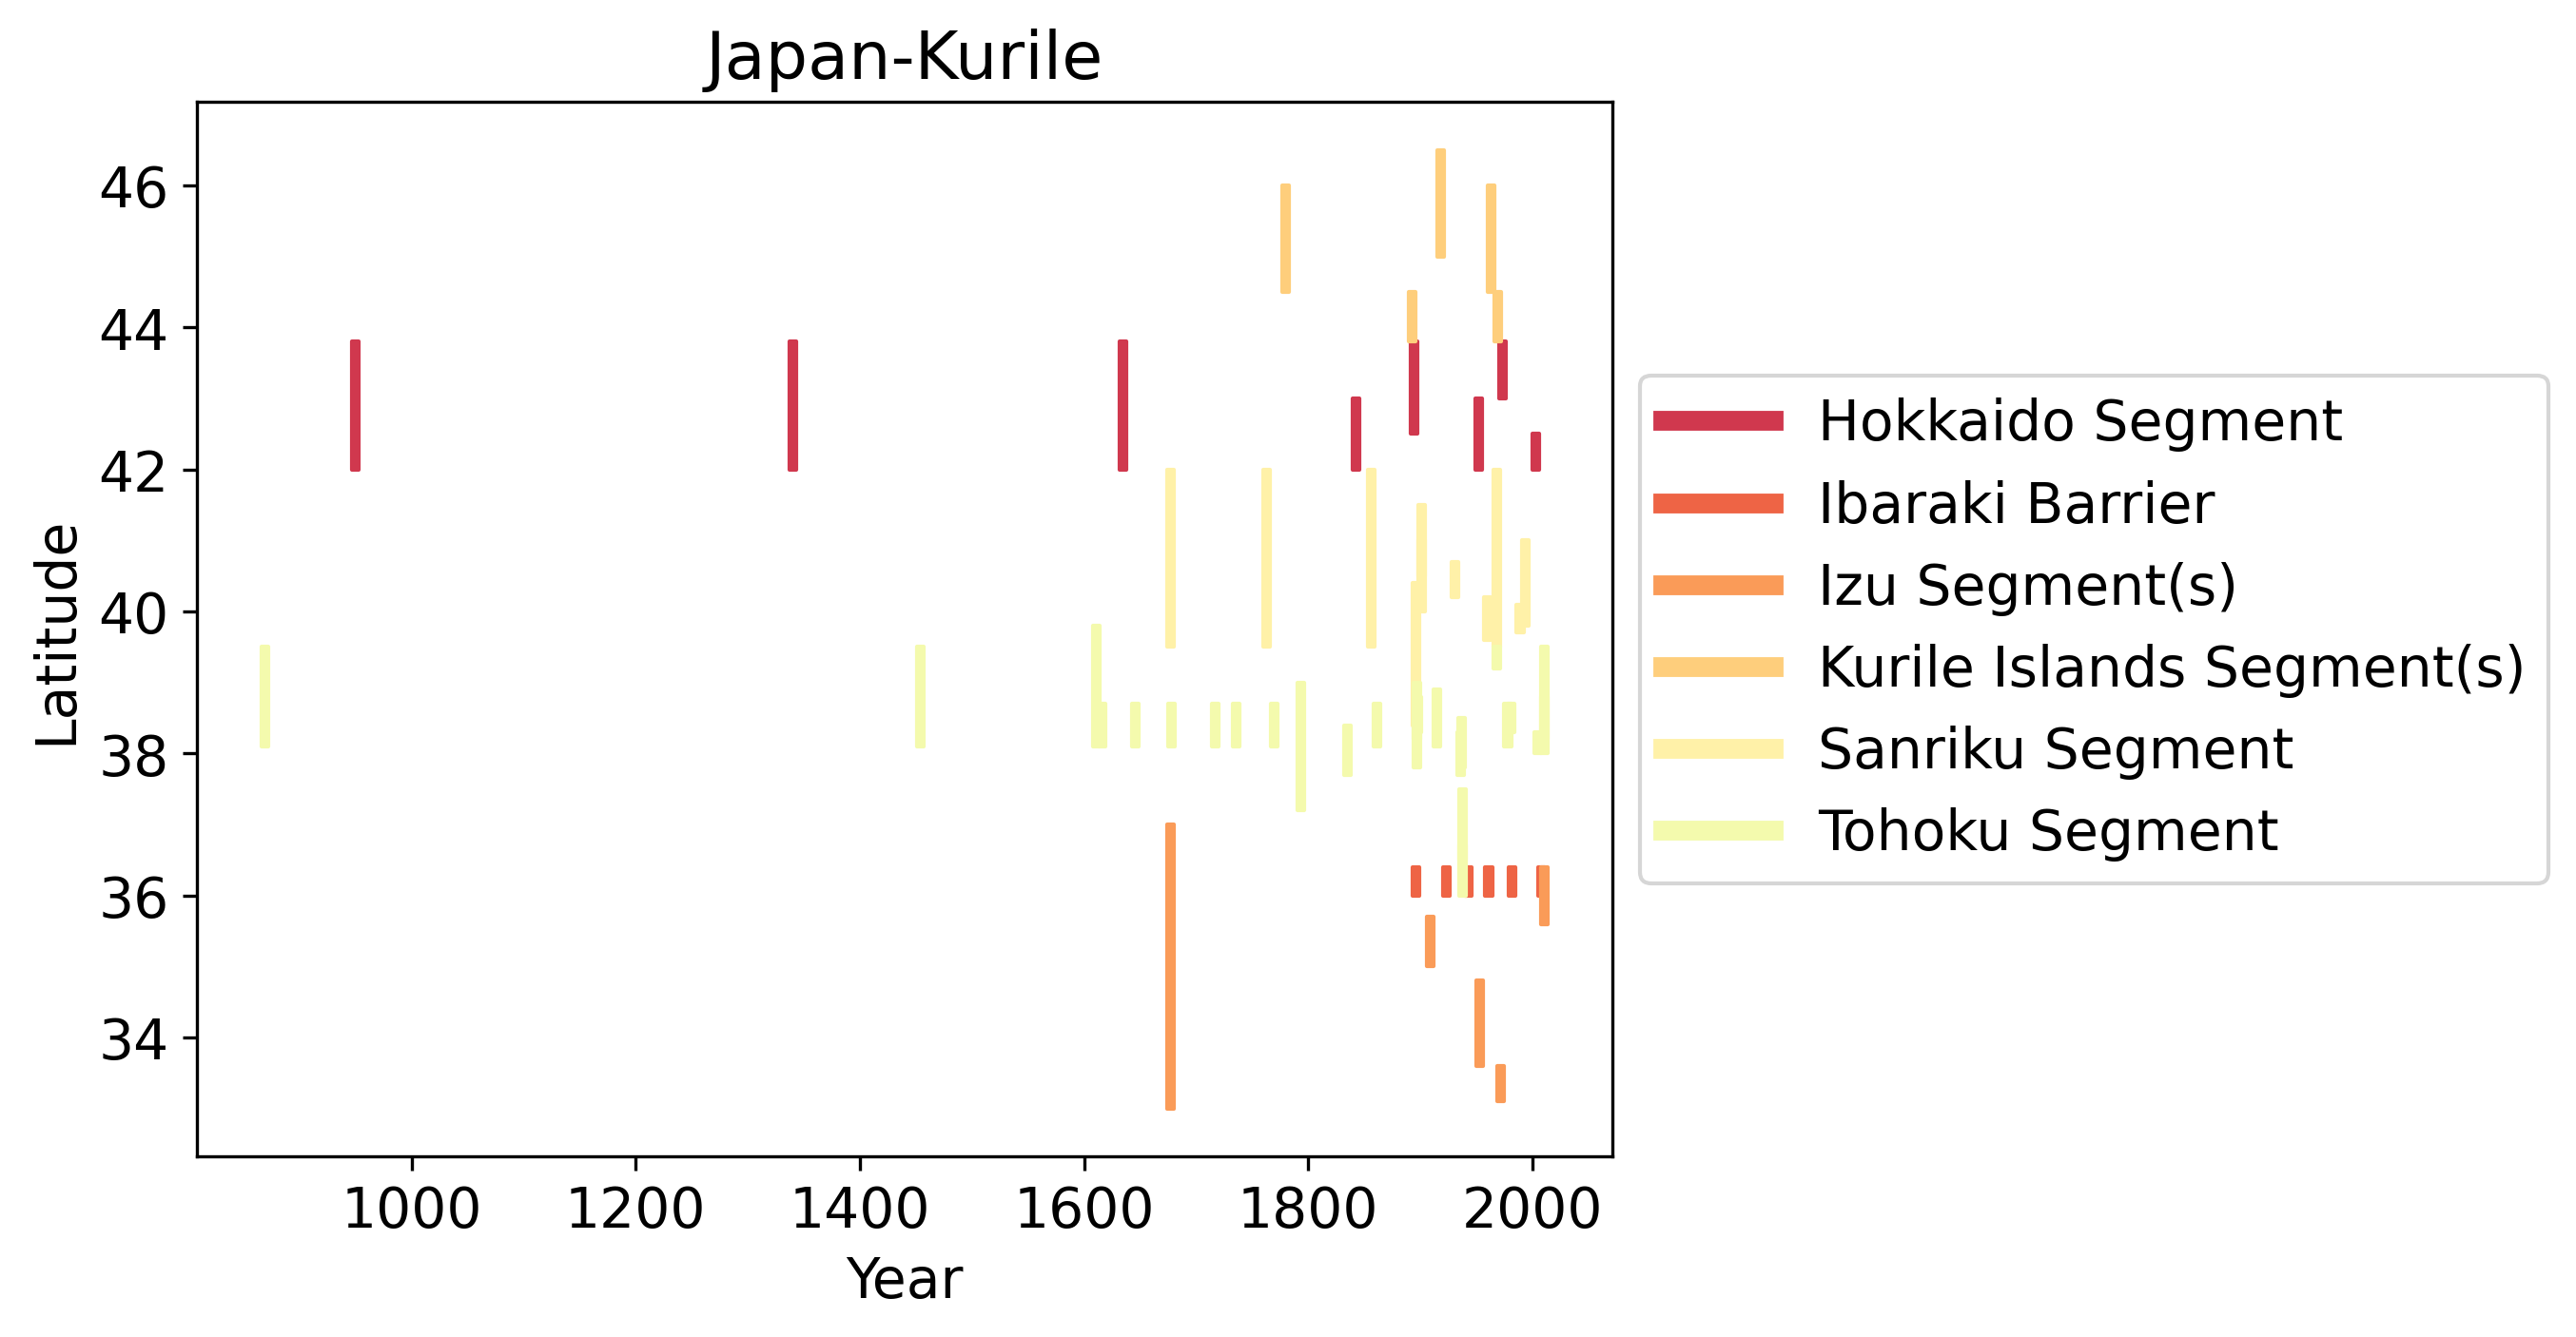

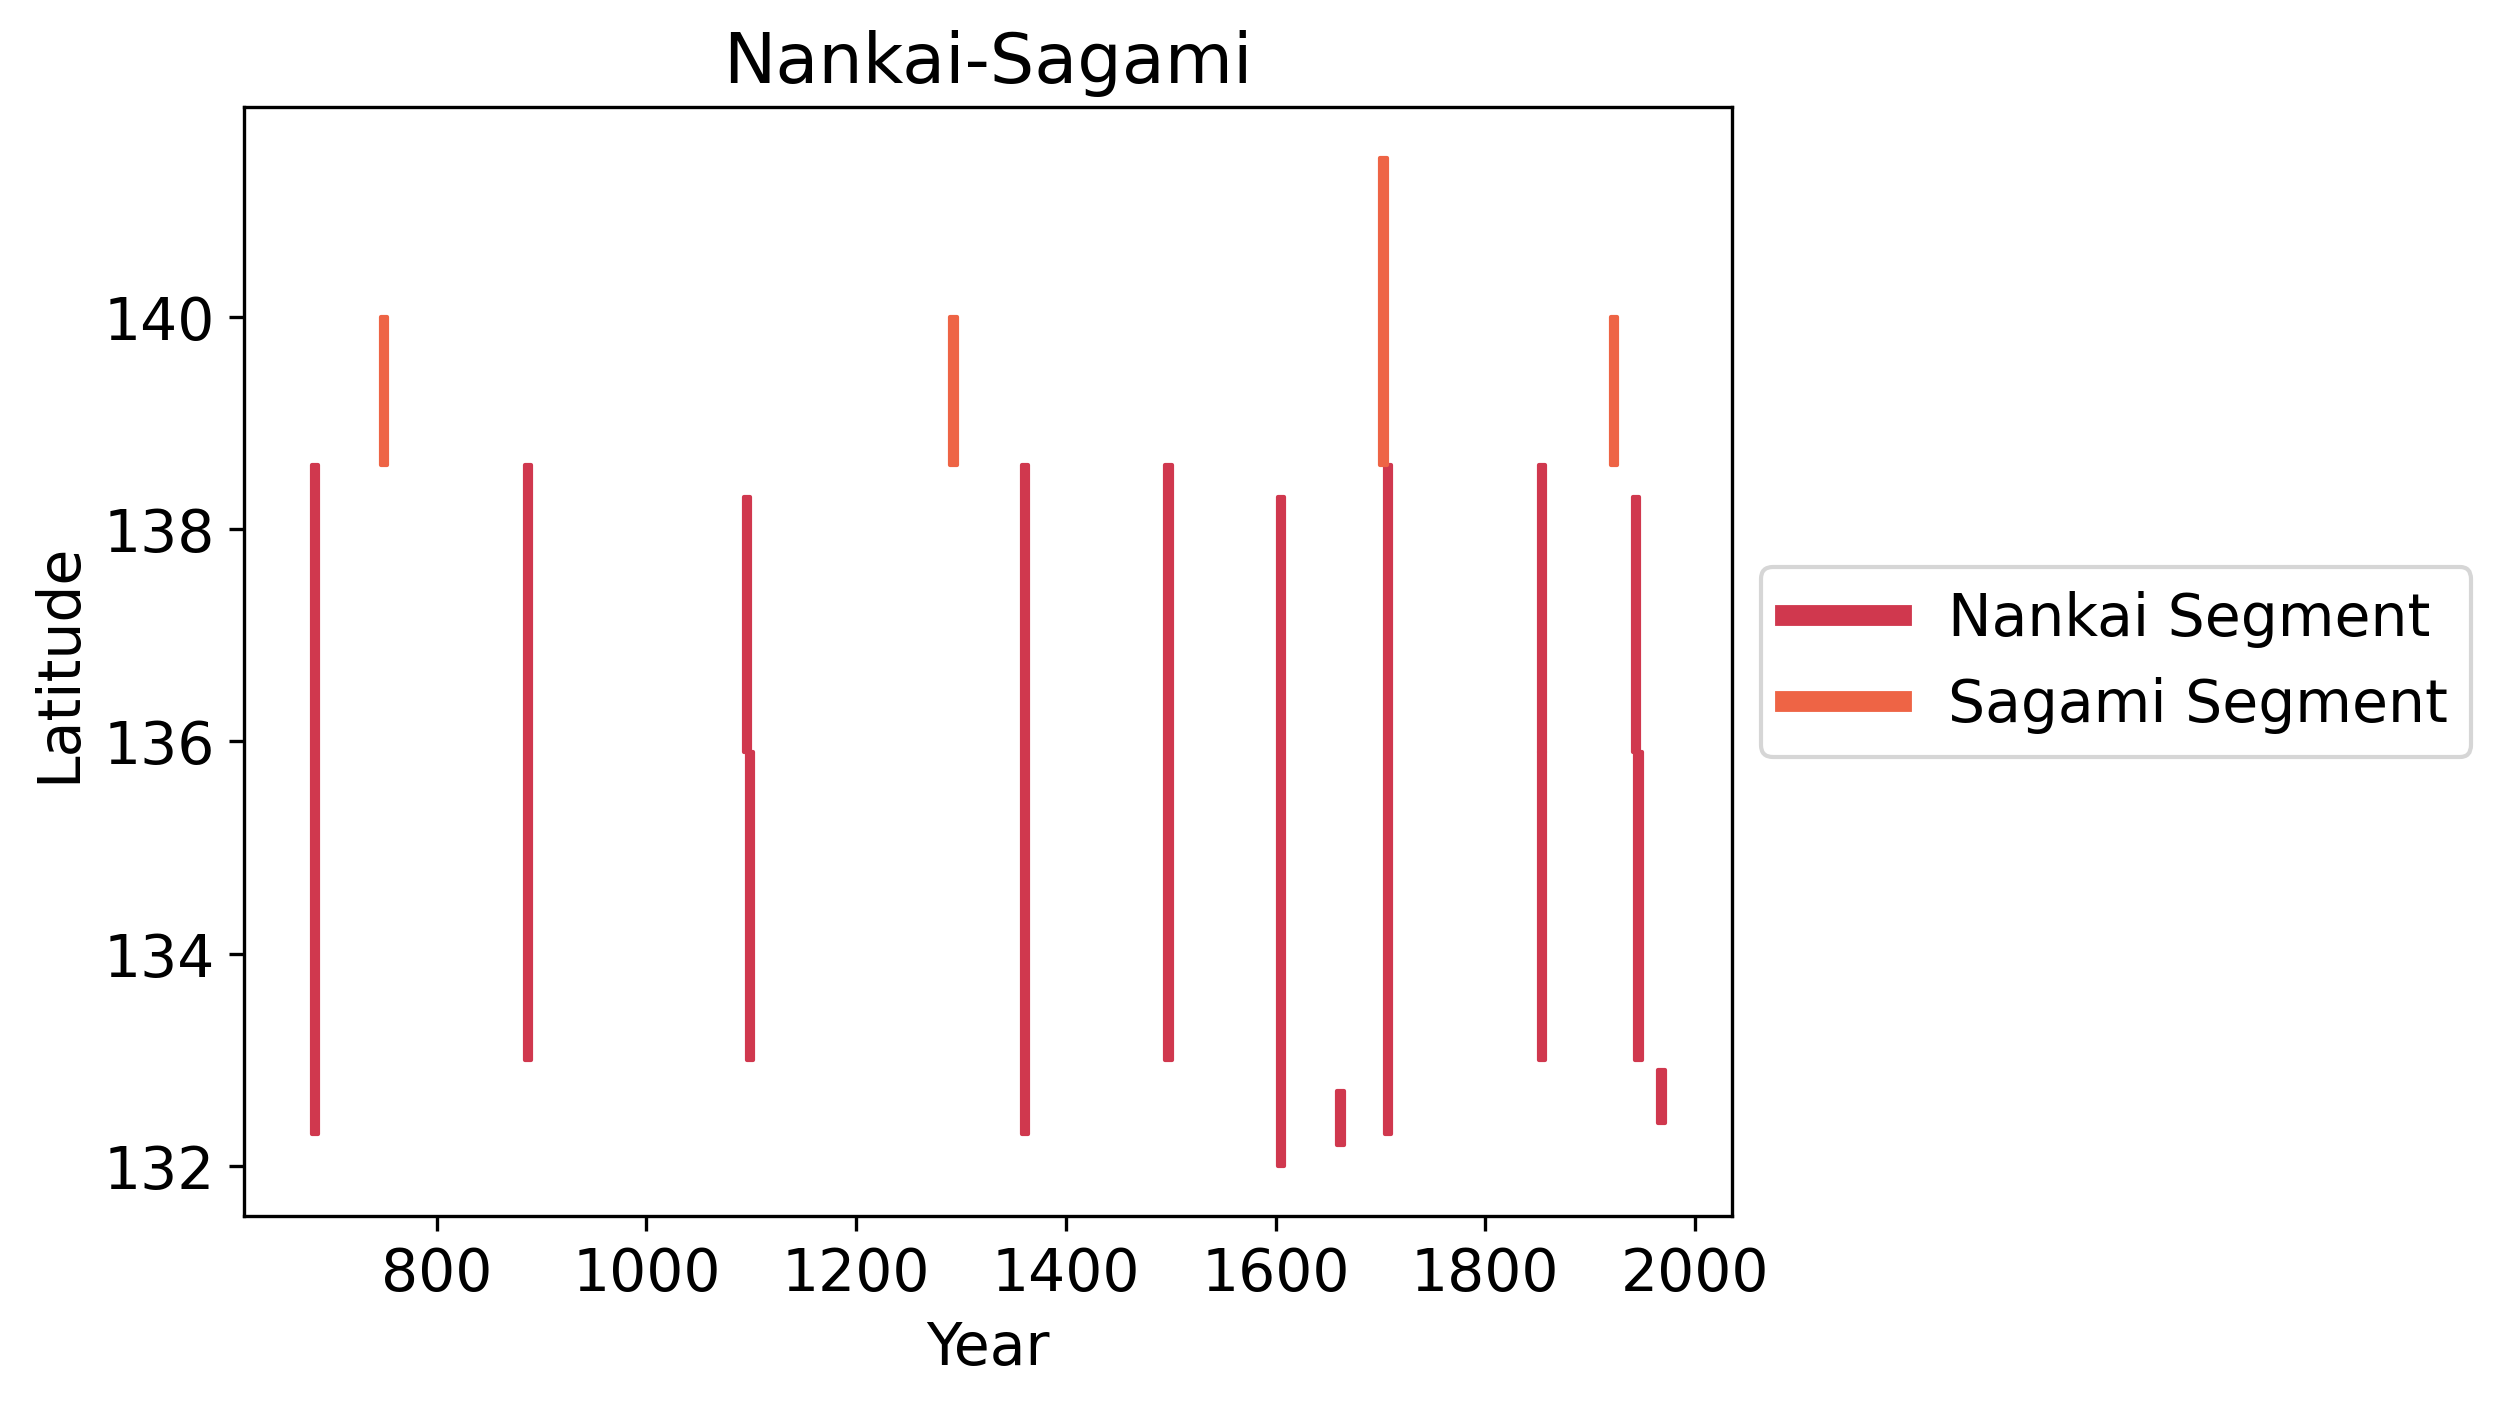

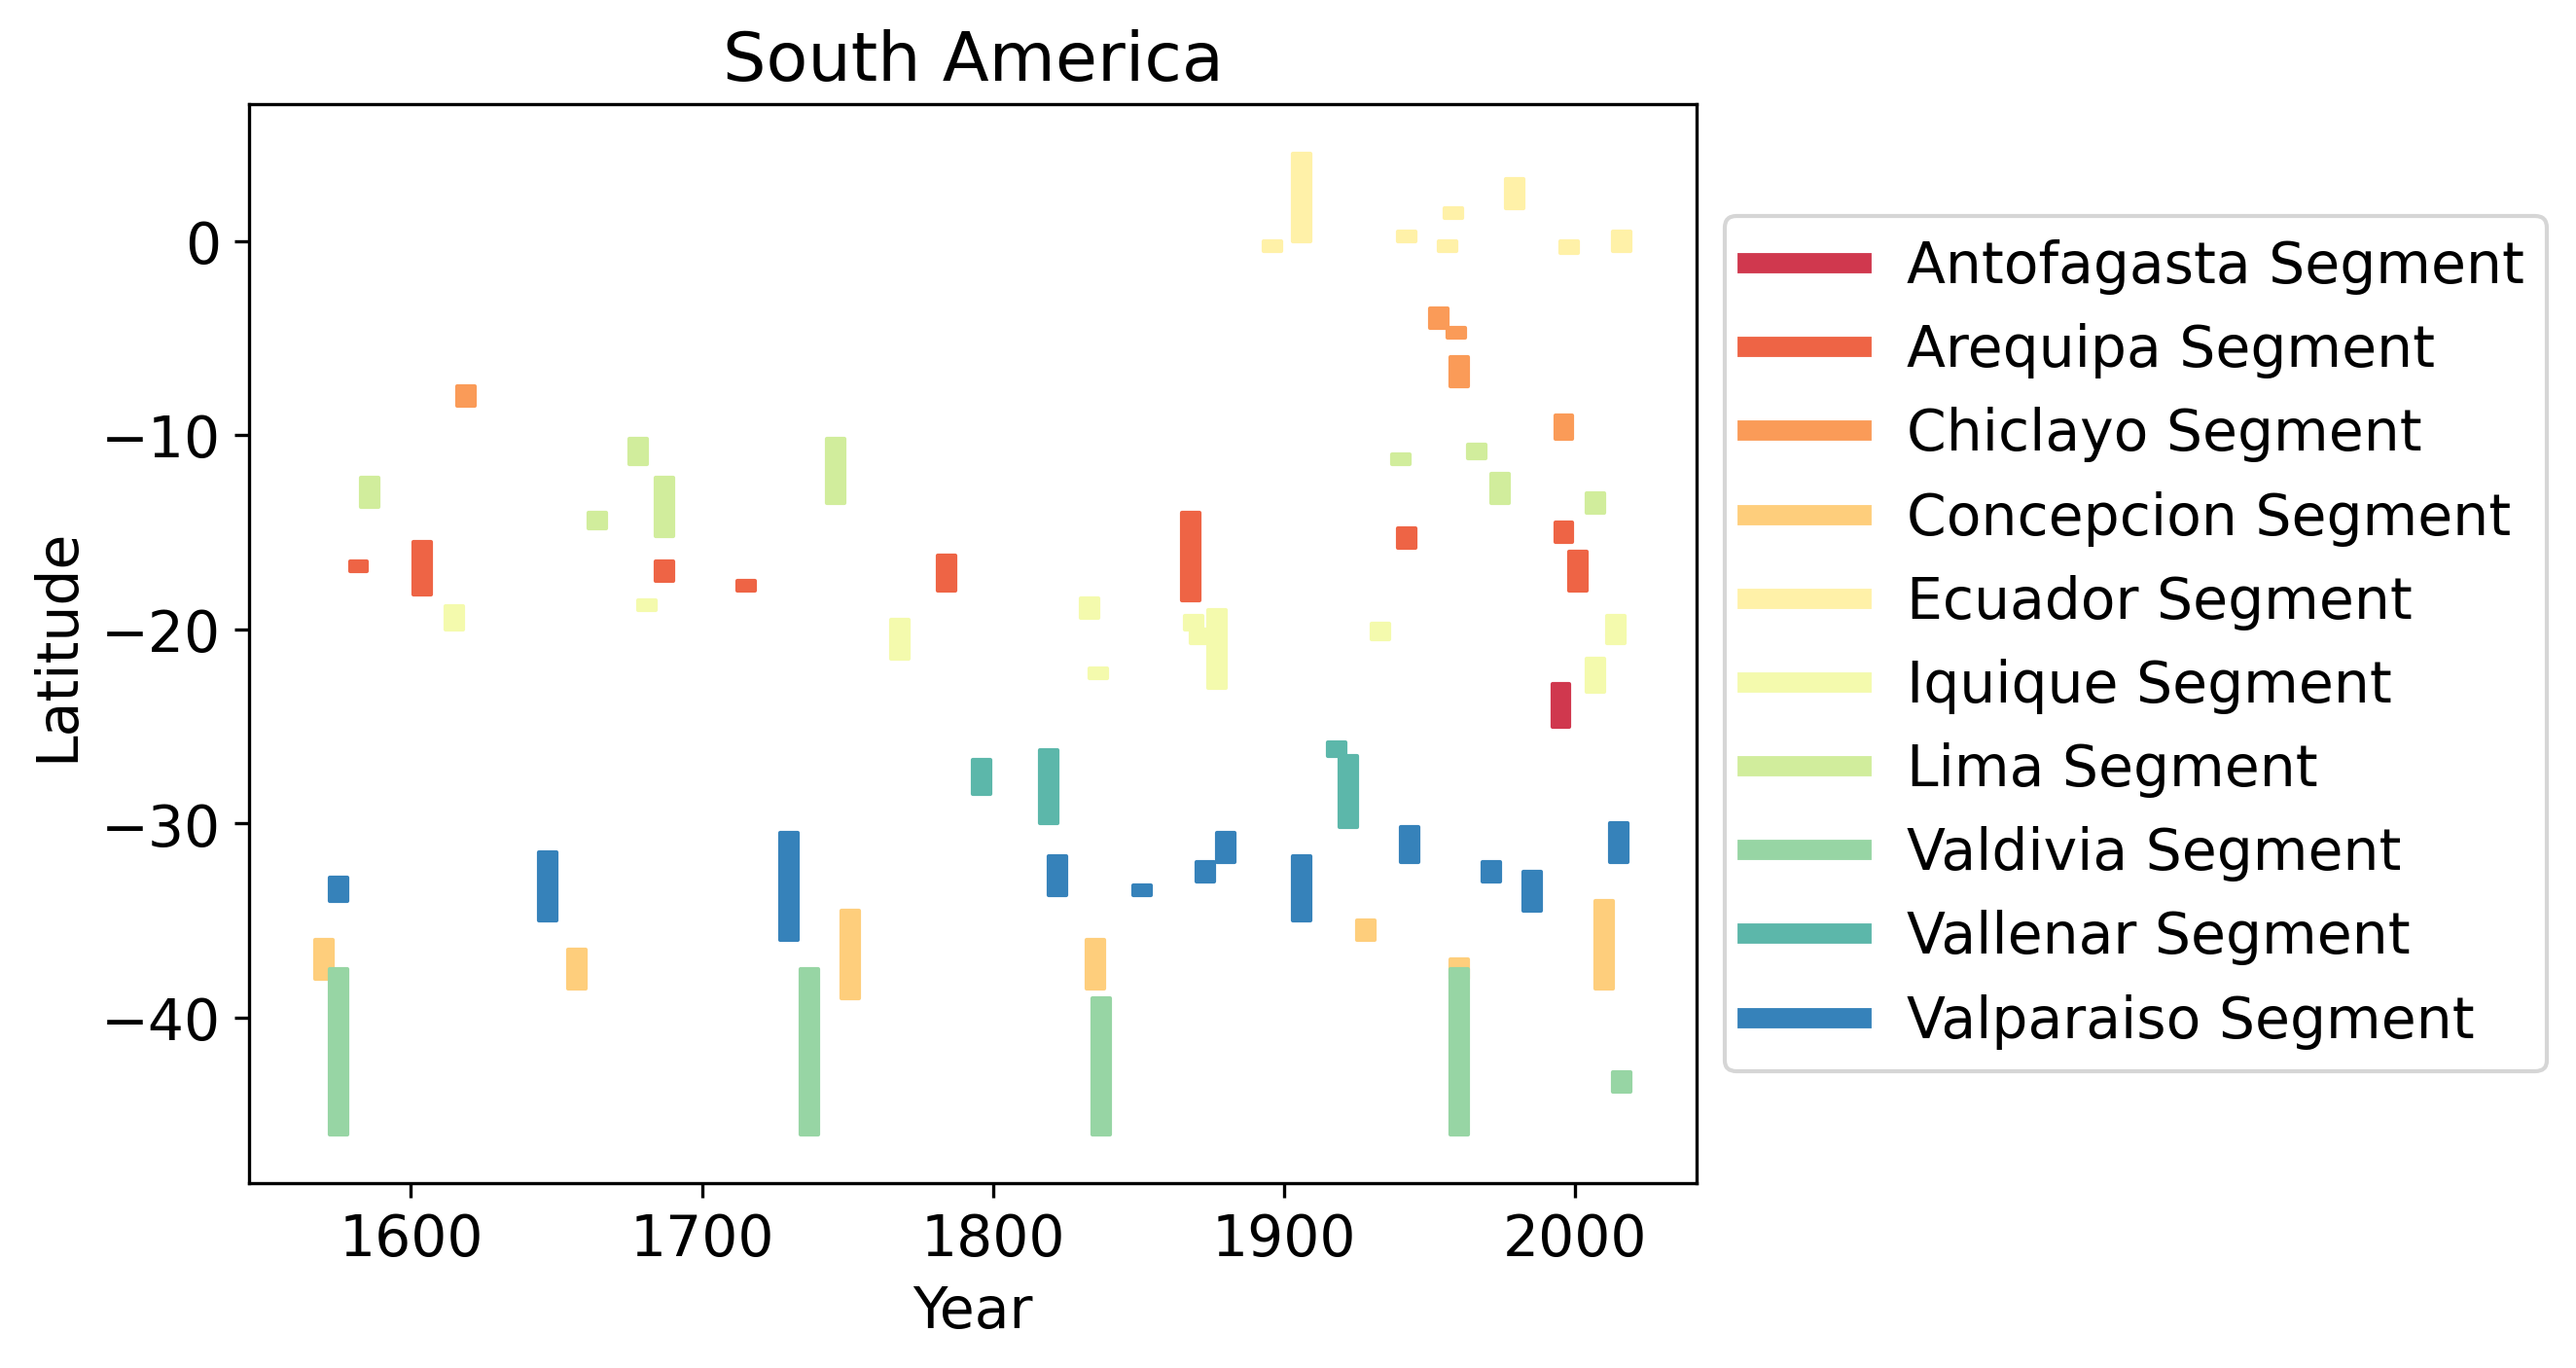

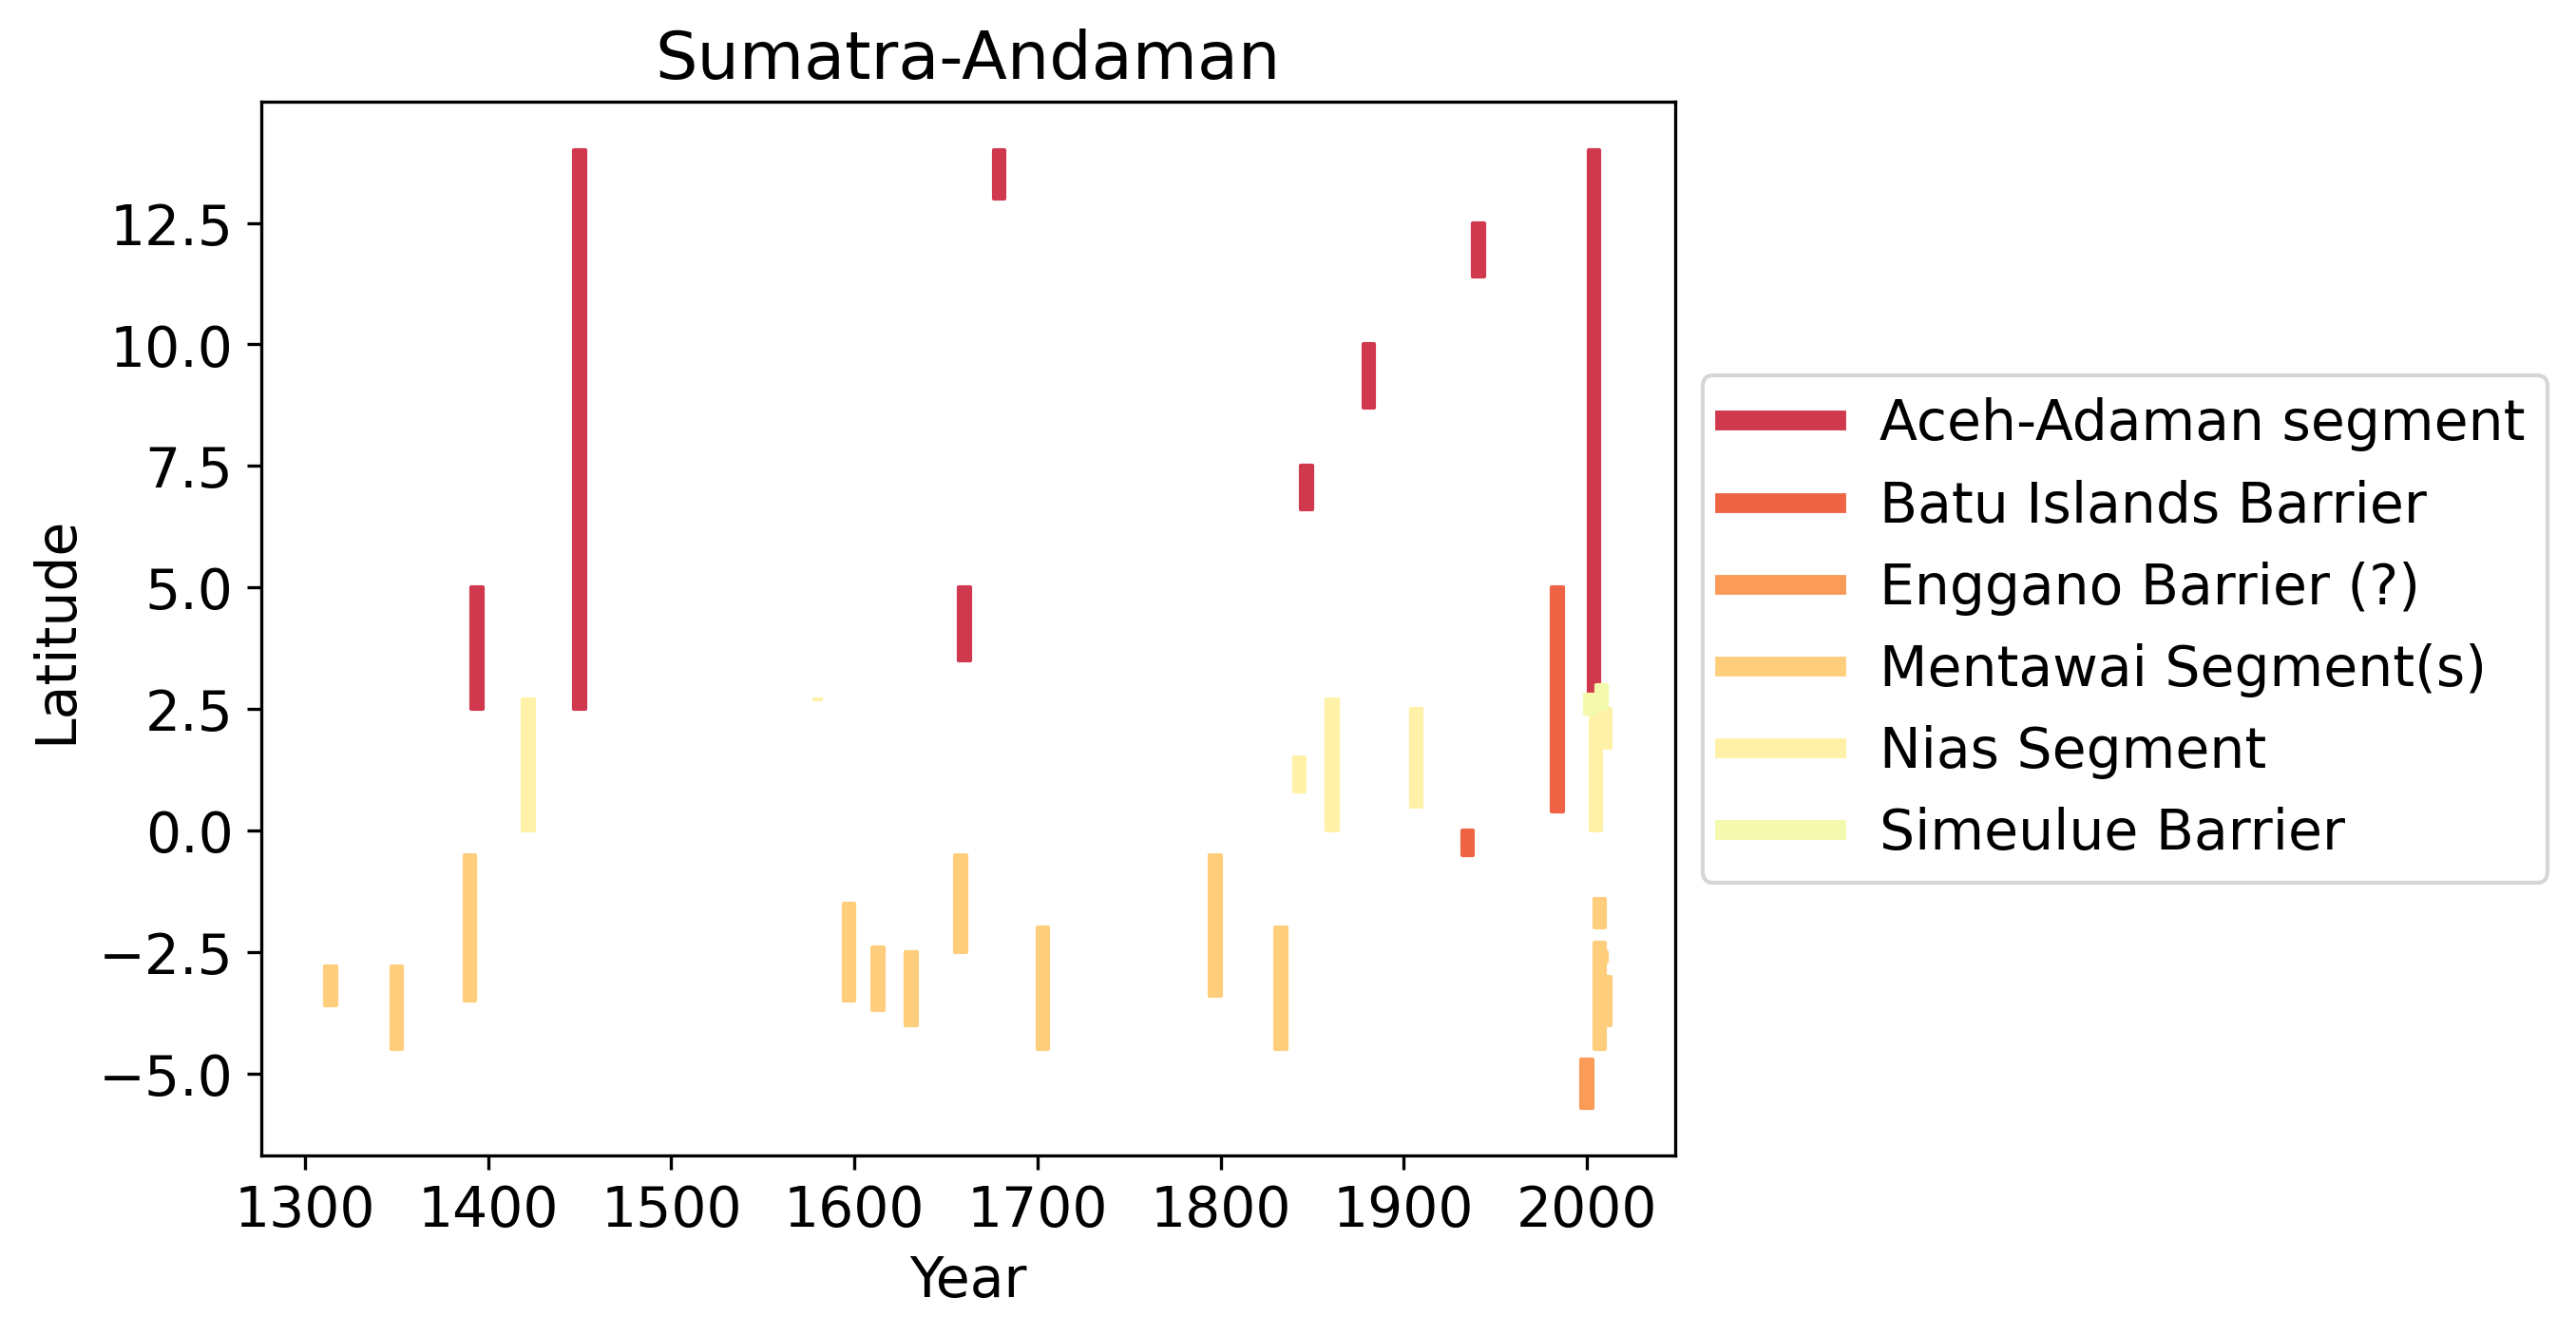

In [6]:
event_width_buffer = 3 # 3 years on either side of the event year for plotting rectangle
if not os.path.exists('Figures'): 
    os.makedirs('Figures')
    
for subduction_zone, group in paleoseismicity.groupby('Subduction zone'):
    plt.figure(dpi=300)
    legend_segments = {}
    segment_colors = {}
    color_palette = sns.color_palette("Spectral",10) 
    for segment, segment_data in group.groupby('Segment'):
        segment_colors[segment] = color_palette[len(segment_colors) % len(color_palette)]
        
        years = segment_data['Year']
        start = segment_data['Start']
        end = segment_data['End']
        type_lat_lon = segment_data['Type_lat_lon'].iloc[0] 
        color = segment_colors[segment]
        for year, north_lat, south_lat in zip(years, start, end):
            plt.fill_betweenx([south_lat, north_lat], year - event_width_buffer, year + event_width_buffer, label=segment, color=color)

        legend_segments[segment] = color
    
    if type_lat_lon == 'Lon':
        plt.ylabel('Longitude')
    elif type_lat_lon == 'Lat':
        plt.ylabel('Latitude')

    plt.xlabel('Year')
    plt.title(subduction_zone)
    legend_handles = [plt.Line2D([0], [0], linewidth = 5, color=color, label=segment) for segment, color in legend_segments.items()]
    plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))
    strname = 'Figures/' + subduction_zone + '.pdf'
    plt.savefig(strname, bbox_inches='tight')
